# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load and prepare the dataset

In [3]:
s_data=pd.read_csv('data.csv',encoding='latin-1')
s_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
s_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
sns.set(rc= {"figure.figsize":(10,5)})

In [6]:
s_data["Date"]=pd.to_datetime(s_data["Date"])
s_data=s_data.set_index("Date")
s_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


# Volume of Stock Traded

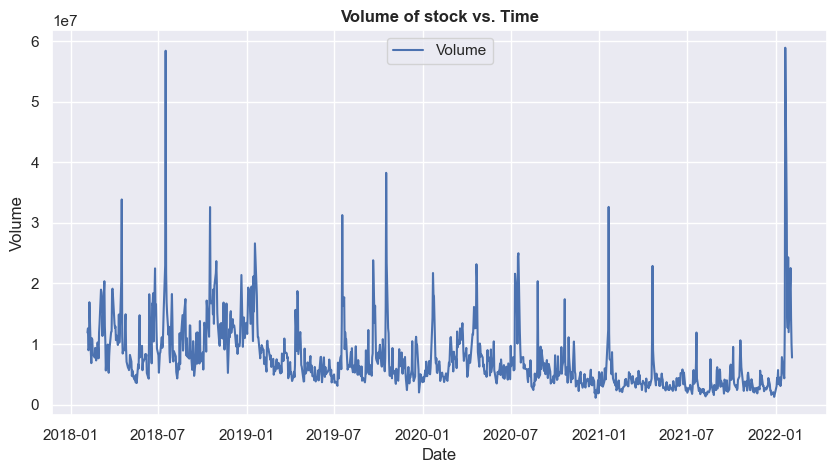

In [7]:
sns.lineplot(x=s_data.index,y=s_data.Volume,label="Volume")
plt.title("Volume of stock vs. Time", fontweight="bold")
plt.show()

# Stock Price: High,Open,Close

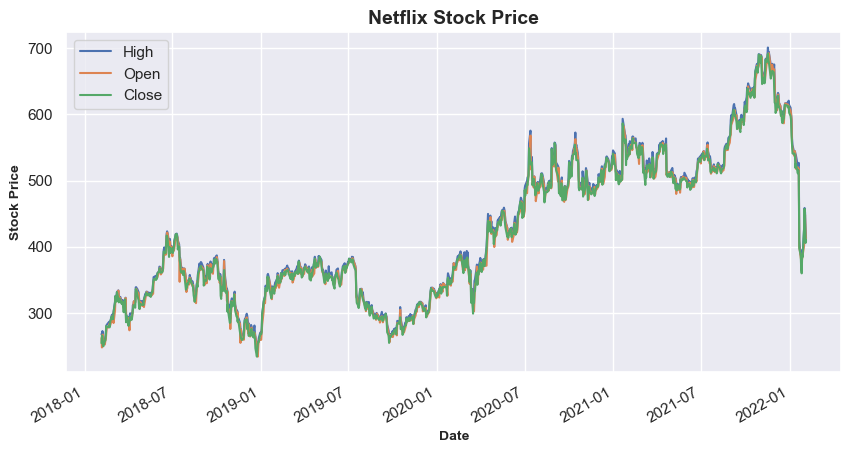

In [9]:
s_data.plot(y= ["High","Open","Close"])
plt.title("Netflix Stock Price",fontweight="bold",fontsize=14)
plt.xlabel("Date",fontweight="bold",fontsize=10)
plt.ylabel("Stock Price",fontweight="bold",fontsize=10)
plt.show()

# Stock Price: Day,Month,Yearwise

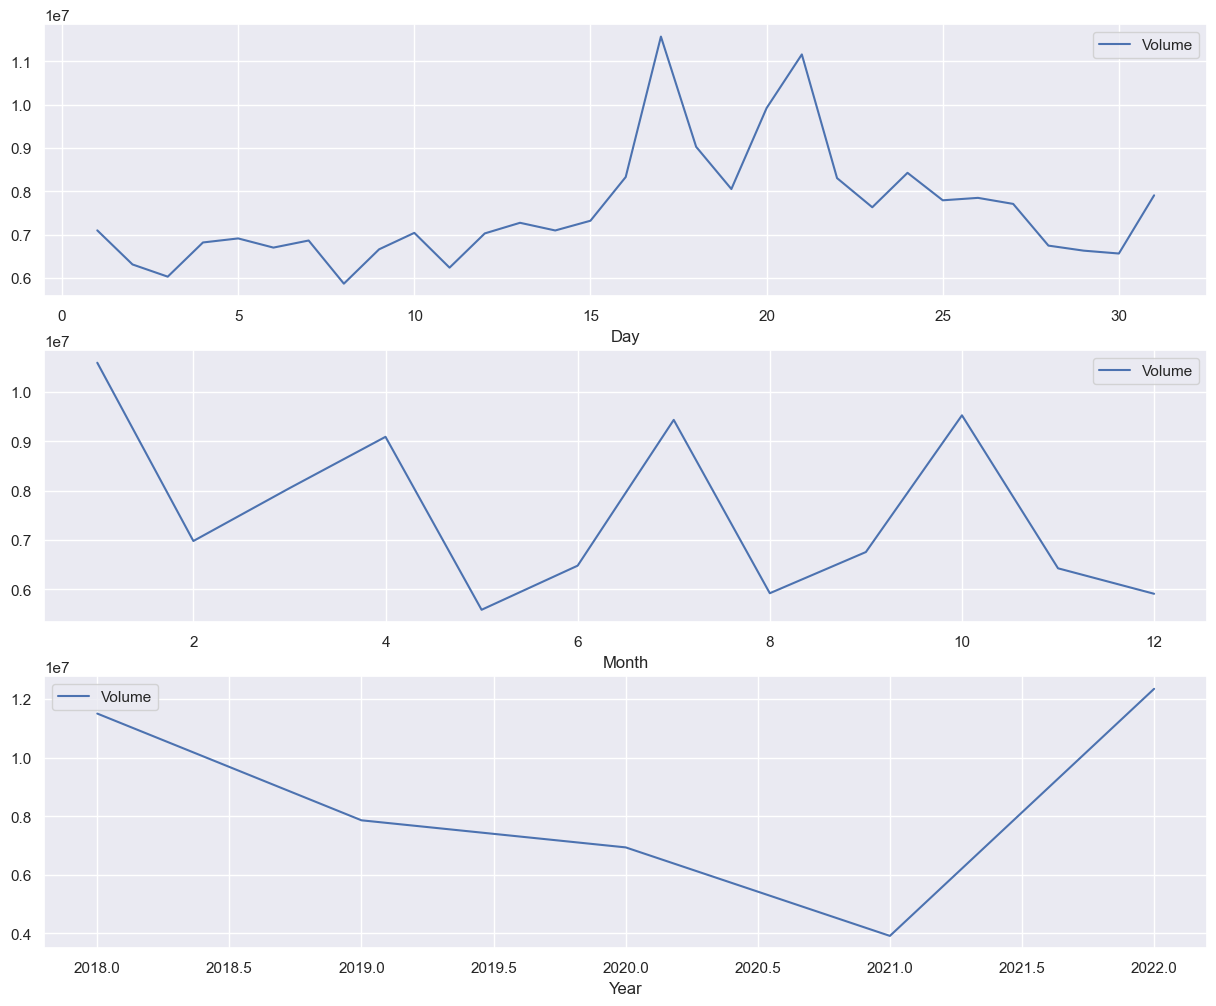

In [10]:
fig, (ax1,ax2,ax3) =plt.subplots(3, figsize=(15,12))
s_data.groupby(s_data.index.day).mean().plot(y="Volume",ax=ax1,xlabel="Day")
s_data.groupby(s_data.index.month).mean().plot(y="Volume",ax=ax2,xlabel="Month")
s_data.groupby(s_data.index.year).mean().plot(y="Volume",ax=ax3,xlabel="Year")
plt.show()

# Top 5 Dates With Highest Stock Price

In [12]:
y=s_data.sort_values(by="High",ascending=False).head(5)
y["High"]

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

# Top 5 Dates With Lowest Stock Price

In [13]:
y=s_data.sort_values(by="Low").head(5)
y["Low"]

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

# Trendline showing High and Low Stock per period of time

<AxesSubplot:xlabel='Date', ylabel='Low'>

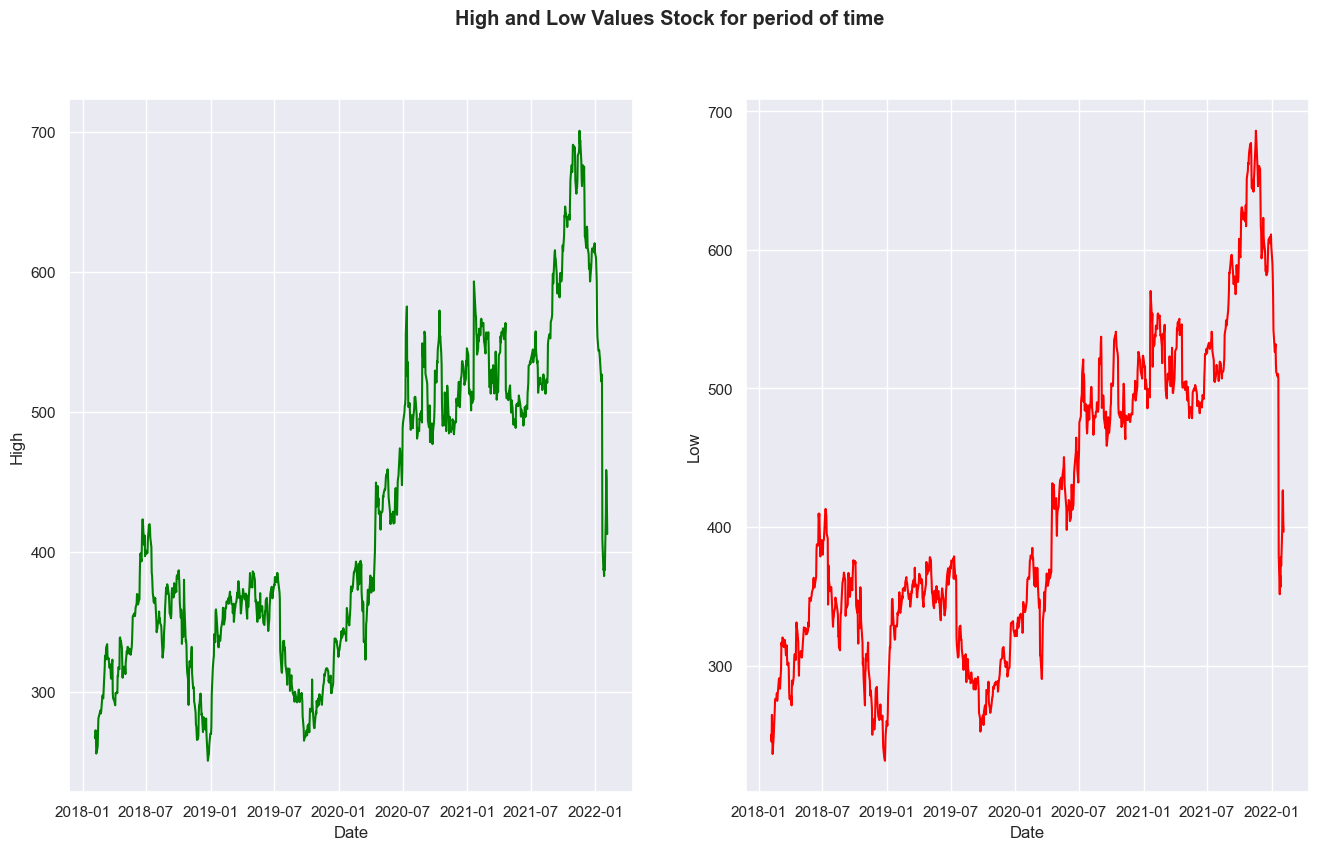

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16,9))
fig.suptitle("High and Low Values Stock for period of time",fontweight="bold")
sns.lineplot(ax=axes[0],y=s_data["High"], x=s_data.index, color="green")
sns.lineplot(ax=axes[1],y=s_data["Low"],x=s_data.index,color="red")